## This notebook is to analyse regulatory elements including AU-rich elements,CU-rich elements. GU-rich elements and Pumilio Binding sits

##  AU rich elements
- AU rich nonamer:  UUAUUUAWW
- AU rich 13-mer:  WWWUAUUUAUWWW and WWAUUUAUUUAWW

In [4]:
import pandas as pd
import re
from scipy.stats import ttest_ind, mannwhitneyu

# Load your dataframe (assuming it has 'sequence' and 'log2FoldChange' columns)
df = pd.read_csv("/home/yg2895/media/protein/yg2895/ASO-lib-20250102/motif_analyse/oligo_FC_hek.csv")  # Replace with your actual file

# Define the motif pattern ('W' means 'A' or 'T')
motif_pattern = re.compile(r'TTATTTA[AT][AT]')

# Extract the subsequence from 16nt to 285nt
df["subseq"] = df["Sequence"].str[15:285]  # Python uses 0-based indexing

# Create two groups based on whether the subsequence contains the motif
df["has_motif"] = df["subseq"].apply(lambda seq: bool(motif_pattern.search(seq)))

# Separate log2FoldChange values into two groups
group_with_motif = df[df["has_motif"]]["log2FoldChange"]
group_without_motif = df[~df["has_motif"]]["log2FoldChange"]

# Perform statistical tests
t_stat, t_pval = ttest_ind(group_with_motif, group_without_motif, nan_policy='omit')
u_stat, u_pval = mannwhitneyu(group_with_motif, group_without_motif, alternative='two-sided')

# Print results
print(f"T-test: t-statistic = {t_stat:.3f}, p-value = {t_pval:.3e}")
print(f"Mann-Whitney U test: U-statistic = {u_stat:.3f}, p-value = {u_pval:.3e}")

T-test: t-statistic = -13.356, p-value = 2.169e-40
Mann-Whitney U test: U-statistic = 1795826.000, p-value = 5.136e-43


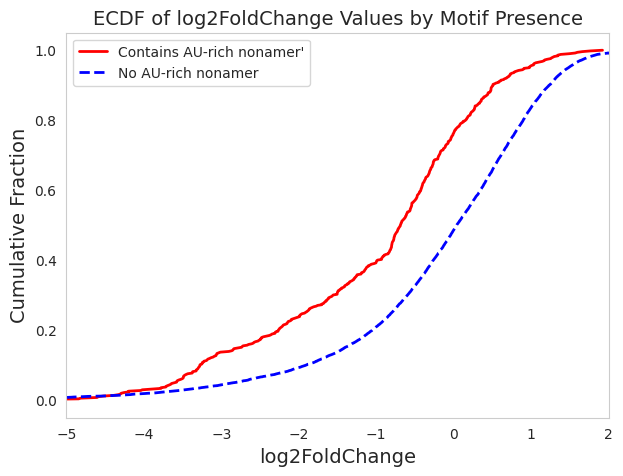

In [6]:
## draw cedf plot
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, mannwhitneyu
import seaborn as sns

# Separate log2FoldChange values into two groups
group_with_motif = df[df["has_motif"]]["log2FoldChange"].dropna().sort_values()
group_without_motif = df[~df["has_motif"]]["log2FoldChange"].dropna().sort_values()

# Compute ECDF
def ecdf(data):
    """Compute x, y values for empirical CDF."""
    x = np.sort(data)
    y = np.arange(1, len(x) + 1) / len(x)
    return x, y

# Get ECDF values for both groups
x_with, y_with = ecdf(group_with_motif)
x_without, y_without = ecdf(group_without_motif)

# Plot CEDF
plt.figure(figsize=(7, 5))
sns.set_style("whitegrid")
plt.plot(x_with, y_with, label="Contains AU-rich nonamer'", color="red", linewidth=2)
plt.plot(x_without, y_without, label="No AU-rich nonamer", color="blue", linewidth=2, linestyle="dashed")

# Labels and title
plt.xlabel("log2FoldChange", fontsize=14)
plt.ylabel("Cumulative Fraction", fontsize=14)
plt.xlim(-5,2)
plt.title("ECDF of log2FoldChange Values by Motif Presence", fontsize=14)
plt.legend()
plt.grid(False)
plt.show()

/tmp/ipykernel_2028819/2263552852.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='motif_count', y='log2FoldChange', data=df_filtered, palette="Blues")


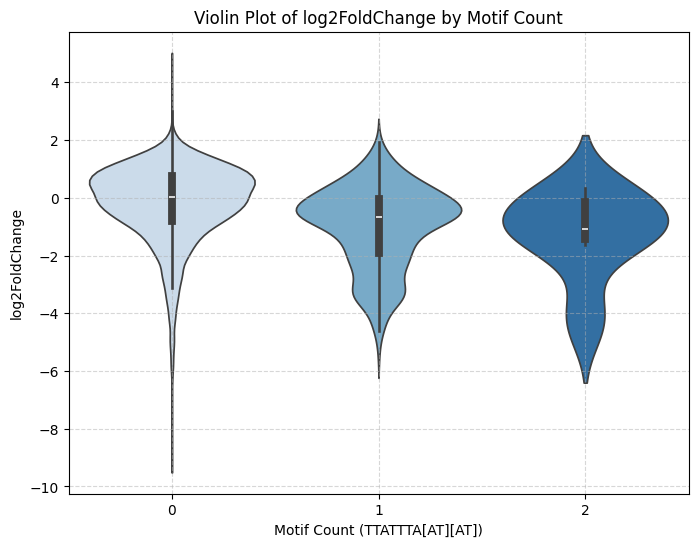

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data
df = pd.read_csv('oligo_FC_hek.csv')

# Define the motif pattern ('W' means 'A' or 'T')
motif_pattern = re.compile(r'TTATTTA[AT][AT]')

# Count motif occurrences in each sequence
df['motif_count'] = df['Sequence'].apply(lambda x: len(motif_pattern.findall(x)) if pd.notna(x) else 0)

# Filter out NaN values in log2FoldChange
df_filtered = df.dropna(subset=['log2FoldChange'])

# Create the violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='motif_count', y='log2FoldChange', data=df_filtered, palette="Blues")

# Formatting
plt.xlabel('Motif Count (TTATTTA[AT][AT])')
plt.ylabel('log2FoldChange')
plt.title('Violin Plot of log2FoldChange by Motif Count')
plt.grid(True, linestyle="--", alpha=0.5)

# Show plot
plt.show()


/tmp/ipykernel_2028819/3108900747.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='motif_count', y='log2FoldChange', data=df_filtered, palette="Blues")


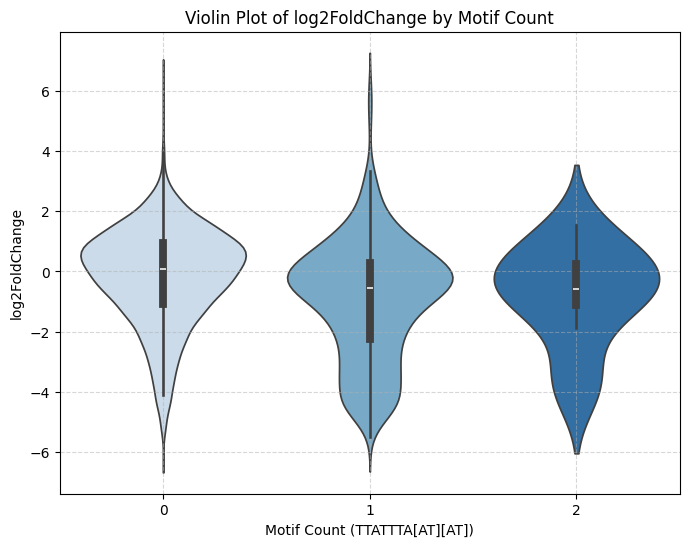

In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data
df = pd.read_csv('oligo_FC_sk.csv')

# Define the motif pattern ('W' means 'A' or 'T')
motif_pattern = re.compile(r'TTATTTA[AT][AT]')

# Count motif occurrences in each sequence
df['motif_count'] = df['Sequence'].apply(lambda x: len(motif_pattern.findall(x)) if pd.notna(x) else 0)

# Filter out NaN values in log2FoldChange
df_filtered = df.dropna(subset=['log2FoldChange'])

# Create the violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='motif_count', y='log2FoldChange', data=df_filtered, palette="Blues")

# Formatting
plt.xlabel('Motif Count (TTATTTA[AT][AT])')
plt.ylabel('log2FoldChange')
plt.title('Violin Plot of log2FoldChange by Motif Count')
plt.grid(True, linestyle="--", alpha=0.5)

# Show plot
plt.show()


    ### After analysis, there is no AU-rich 13mer, CU-rich and pumilio binding site

    "AT-rich nonamer": re.compile(r'TTATTTA[AT][AT]'),
    "AT-rich 13-mer": re.compile(r'^[AT]{3}UAUUUAU[AT]{3}$|^[AT]{2}AUUU[AT]{4}A[AT]{2}$'),
    "CU-rich": re.compile(r'[CU]CCA.{1,}CCC[UA][CU][CU]UC[CU]CC'),
    "GU-rich": re.compile(r'TGTTTGTTTGT'),
    "Pumilio": re.compile(r'UGUA[AUGC]AUA')

/tmp/ipykernel_266426/3927633087.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=plot_df, x="Motif", y="Mean log2FoldChange", palette="Blues_r")


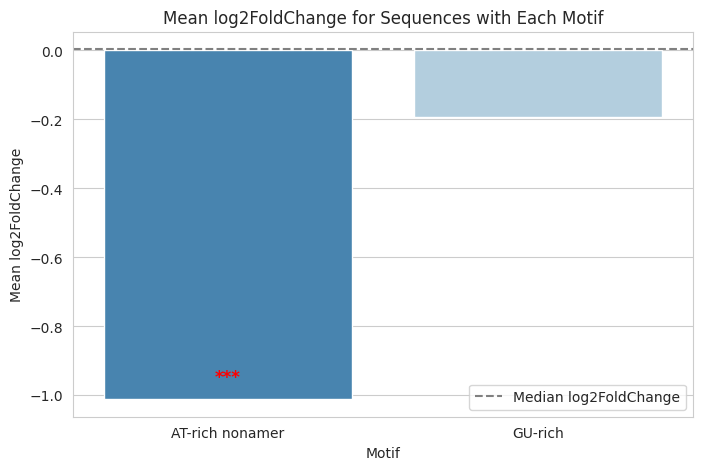

In [13]:
import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp

# Load Data
df = pd.read_csv("/home/yg2895/media/protein/yg2895/ASO-lib-20250102/motif_analyse/oligo_FC_hek.csv")

# Define motif patterns
motifs = {
    "AT-rich nonamer": re.compile(r'TTATTTA[AT][AT]'),
    "GU-rich": re.compile(r'TGTTTGTTTGT'),
}

# Extract median log2FoldChange for comparison
median_log2FoldChange = df["log2FoldChange"].median()

# Dictionary to store motif log2FoldChange values
motif_log2FoldChange = {}

# Check for motif presence and collect log2FoldChange values
for name, pattern in motifs.items():
    df[name] = df["Sequence"].apply(lambda seq: bool(pattern.search(seq)))
    motif_log2FoldChange[name] = df[df[name]]["log2FoldChange"].dropna()

# Calculate mean log2FoldChange and perform t-tests
motif_means = {name: values.mean() for name, values in motif_log2FoldChange.items()}
p_values = {name: ttest_1samp(values, median_log2FoldChange, nan_policy='omit')[1] if len(values) > 1 else 1 for name, values in motif_log2FoldChange.items()}

# Mark significance
def significance_marker(p):
    if p < 0.001:
        return "***"
    elif p < 0.01:
        return "**"
    elif p < 0.05:
        return "*"
    else:
        return ""

significance_labels = {name: significance_marker(p) for name, p in p_values.items()}

# Convert data to DataFrame for plotting
plot_df = pd.DataFrame({
    "Motif": list(motif_means.keys()),
    "Mean log2FoldChange": list(motif_means.values()),
    "Significance": list(significance_labels.values())
})

# Plot bar chart
plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")
ax = sns.barplot(data=plot_df, x="Motif", y="Mean log2FoldChange", palette="Blues_r")

# Add significance markers
for i, row in enumerate(plot_df.itertuples()):
    ax.text(i, row[2] + 0.05, row[3], ha='center', fontsize=12, fontweight='bold', color='red')

# Labels and title
plt.axhline(median_log2FoldChange, color='gray', linestyle='dashed', label="Median log2FoldChange")
plt.ylabel("Mean log2FoldChange")
plt.title("Mean log2FoldChange for Sequences with Each Motif")
plt.legend()
plt.show()


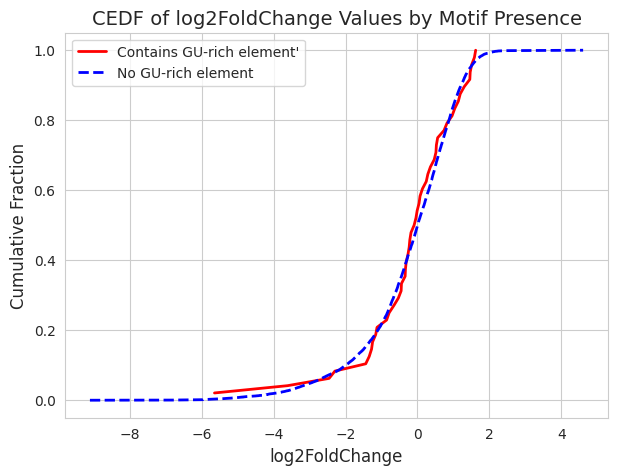

In [15]:
## draw cedf plot
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, mannwhitneyu
import seaborn as sns

# Load your dataframe (assuming it has 'sequence' and 'log2FoldChange' columns)
df = pd.read_csv("/home/yg2895/media/protein/yg2895/ASO-lib-20250102/motif_analyse/oligo_FC_hek.csv")  # Replace with your actual file

# Define the motif pattern ('W' means 'A' or 'T')
motif_pattern = re.compile(r'TGTTTGTTTGT')

# Extract the subsequence from 16nt to 285nt
df["subseq"] = df["Sequence"].str[15:285]  # Python uses 0-based indexing

# Create two groups based on whether the subsequence contains the motif
df["has_motif"] = df["subseq"].apply(lambda seq: bool(motif_pattern.search(seq)))

# Separate log2FoldChange values into two groups
group_with_motif = df[df["has_motif"]]["log2FoldChange"].dropna().sort_values()
group_without_motif = df[~df["has_motif"]]["log2FoldChange"].dropna().sort_values()

# Compute ECDF
def ecdf(data):
    """Compute x, y values for empirical CDF."""
    x = np.sort(data)
    y = np.arange(1, len(x) + 1) / len(x)
    return x, y

# Get ECDF values for both groups
x_with, y_with = ecdf(group_with_motif)
x_without, y_without = ecdf(group_without_motif)

# Plot CEDF
plt.figure(figsize=(7, 5))
sns.set_style("whitegrid")
plt.plot(x_with, y_with, label="Contains GU-rich element'", color="red", linewidth=2)
plt.plot(x_without, y_without, label="No GU-rich element", color="blue", linewidth=2, linestyle="dashed")

# Labels and title
plt.xlabel("log2FoldChange", fontsize=12)
plt.ylabel("Cumulative Fraction", fontsize=12)
plt.title("CEDF of log2FoldChange Values by Motif Presence", fontsize=14)
plt.legend()
plt.show()